## ***Name : `Fawad Ali Shaikh`***
## ***Course : `Data Science`***

## ***ML `(Titanic dataset)`***

### ***`Import` `Libraries`***

In [2]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Pre-process
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, recall_score

# Save the model
import os
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")




## ***Let's do `EDA`***

In [3]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Shape of dataset

df.shape

(891, 15)

In [5]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 891
Number of columns: 15


In [6]:
# Columns' name in the dataset

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# Summary

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check Null Values

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
# Null Values
print(f'So we have {df["age"].isnull().sum()} null values in age, {df["deck"].isnull().sum()} in deck, {df["embarked"].isnull().sum()} in embarked and {df["embark_town"].isnull().sum()} in the embark_town.')

So we have 177 null values in age, 688 in deck, 2 in embarked and 2 in the embark_town.


## ***Let's Remove `Null Values`***

In [11]:
# Remove deck column

df.drop('deck', axis=1, inplace=True)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
# Impute missing values in fare & age column

df['fare'].fillna(df['fare'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)


In [13]:
# Impute missing values in embarked & embark_town column

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [14]:
# Let's check null values

df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [15]:
print(f'So we have no null value in the dataset')

So we have no null value in the dataset


## ***`Pre-processing`***

In [16]:
# Encode categorical & object variables

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['class'] = le.fit_transform(df['class'])
df['who'] = le.fit_transform(df['who'])
df['adult_male'] = le.fit_transform(df['adult_male'])
df['embark_town'] = le.fit_transform(df['embark_town'])
df['alive'] = le.fit_transform(df['alive'])
df['alone'] = le.fit_transform(df['alone'])


In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


## ***`Machine Learning`***


In [18]:
X = df.drop('survived', axis=1)
y = df['survived']


In [19]:
# split into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
# Call the model

model = LogisticRegression()

In [21]:
# Train the model

model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Predict

pred = model.predict(X_test)

In [23]:
# Evalute

print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(f'Precision: {precision_score(y_test, pred)}')
print(f'Recall: {recall_score(y_test, pred)}')
print(f'F1 Score: {f1_score(y_test, pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}')
print(f'Classification Report: \n{classification_report(y_test, pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[113   0]
 [  0  66]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        66

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

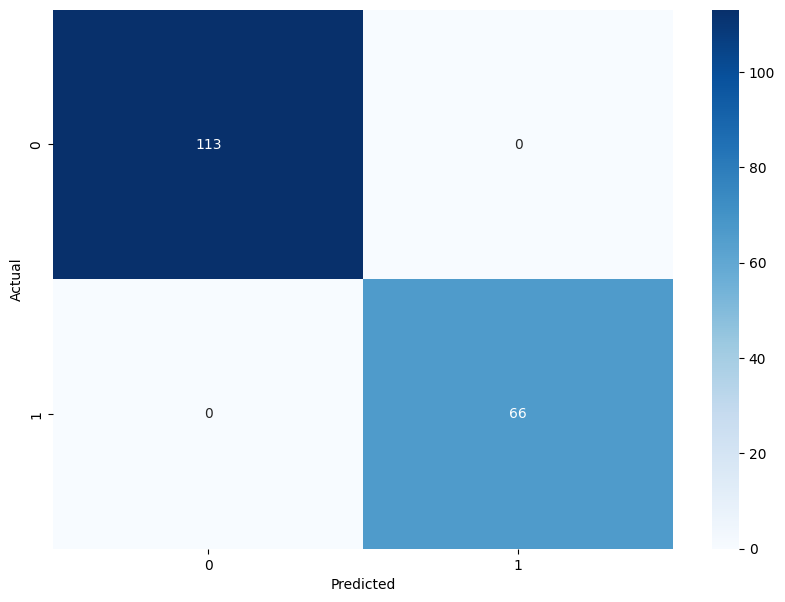

In [24]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues',fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
# Actual number of survivors in the test data
actual_survivors = y_test.sum()

# Predicted number of survivors by the model
predicted_survivors = model.predict(X_test).sum()

print(f"Actual number of survivors: {actual_survivors}")
print(f"Predicted number of survivors: {predicted_survivors}")

Actual number of survivors: 66
Predicted number of survivors: 66


***This shows our model work better on this dataset.***

In [26]:
# Create the directory if it doesn't exist
os.makedirs('./saved_models', exist_ok=True)

# Now save the model
pickle.dump(model, open('./saved_models/titanic_model_logistic_regression.pkl', 'wb'))